<a href="https://colab.research.google.com/github/likithachinnibunny/Zeotap_DataScience_Intern_Tasks/blob/main/Sompalli_Likhitha_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-96bb33aceaa6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


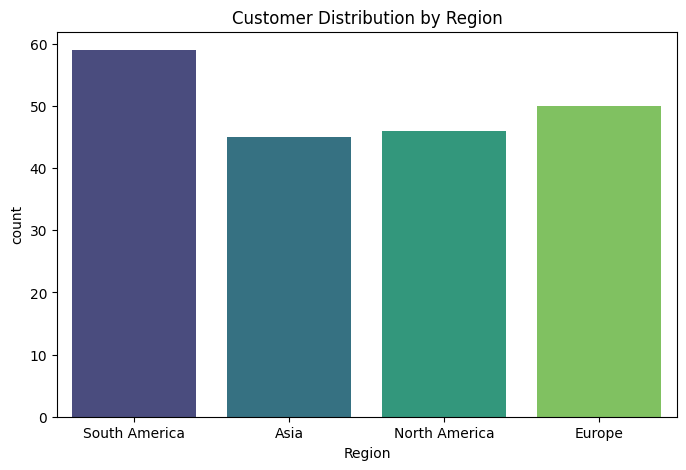

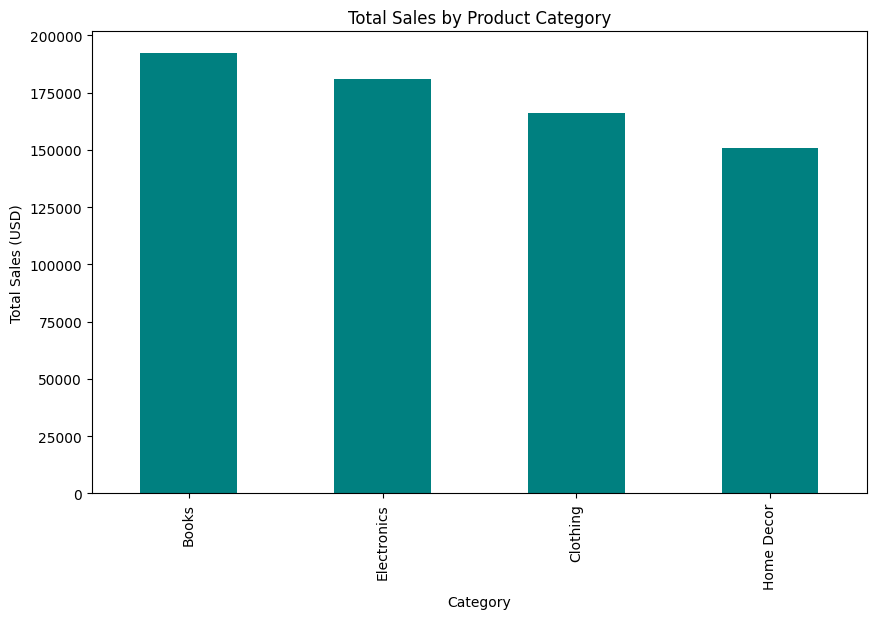

In [3]:
!pip install gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(gdown.download(customers_url, quiet=True))
products = pd.read_csv(gdown.download(products_url, quiet=True))
transactions = pd.read_csv(gdown.download(transactions_url, quiet=True))


customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

merged_data = merged_data.dropna()

plt.figure(figsize=(8,5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()

sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', color='teal', figsize=(10,6))
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()